In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Simple GPT example

In [1]:
import sys, os
root = os.path.join(os.getcwd(), '../')

sys.path.append(root)

INPUT_FILE = os.path.join(root,'templates/dcgun/gpt.in')

from gpt import GPT

In [2]:
G = GPT(input_file=INPUT_FILE, verbose=True)

Configured to run in /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmpsyhb9tj0


In [4]:
# Available variables
G.input['variables']

{'data_dump': 0.0,
 'Master_RF': 1300000000.0,
 'MTE': 120.0,
 'gun_voltage': 300.0,
 'sol_1_current': 3.32107,
 'auto_phase': 0.0,
 'single_particle': 0.0,
 'space_charge': 1.0,
 'space_charge_type': 1.0,
 'viewscreens_on': 1.0,
 'kill_backwards_particles': 1.0,
 'optimize_on': 0.0,
 'xoffset': 0.0,
 'yoffset': 0.0,
 'RadiusMax': 0.04,
 'GBacc': 5.5,
 'xacc': 6.5,
 'dtmin': 1e-16,
 'dtmax': 1e-10,
 'ZSLA01': 0.344,
 'ZCTB01': 0.746,
 'ZSLA02': 1.16,
 'Zdcgun': 0.15,
 'Maxdcgun': 500.0,
 'SLAPolarity': -1.0,
 'LSLA01': 0.6,
 'XSLA01': 0.0,
 'YSLA01': 0.0,
 'THXSLA01': 0.0,
 'IA1SDR01_z': 0.922,
 'ZSTOP': 1.5,
 'Alpha': 1.0,
 'Fn': 0.5,
 'verror': 0.005,
 'Nstd': 5.0,
 'tree_code_theta': 1.0,
 'tree_code_R': 1e-06,
 'Ntout': 50.0,
 'tmax': 1e-08,
 'ZSTART': -0.005}

In [5]:
import sys, os
root = os.path.join(os.getcwd(), '../')
INPUT_FILE = os.path.join(root,'templates/dcgun/gpt.in')
sys.path.append(root)

In [6]:
# Set some of these
variables_were_set = G.set_variables({'gun_voltage':375,'sol_1_current':-3})
print(variables_were_set)

[True, True]


In [7]:
# Run
G.run()

init dir:  /Users/chrisonian/Code/GitHub/lume-gpt/examples
running GPT in /private/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpb9thma6r

General Particle Tracer - Oct 28 2014


In [8]:
# Ouput
G.output.keys()

dict_keys(['particles', 'start_time', 'run_time', 'run_error'])

In [9]:
# Raw screens
len(G.screen)

1

In [10]:
# Raw touts 
len(G.tout)

32

In [11]:
# Info
print(G)

GPT object:
   Original input file: gpt.in
   Use temp directory: True
   Work directory: None

Run Control
   Run configured: True
   Using temp directory: False
   Timeout: None (sec)

Results
   Finished: True
   Error occured: False
   Run time: 1.5247418880462646 (sec)


In [12]:
# Unique fingerprint based on input
G.fingerprint()

'204b984ebe4043ebaa04786333b5520a'

# Particle stats

In [13]:
# Some statistic that can be calculated on the particles
G.stat('norm_emit_x')

array([1.74030518e-06, 5.05909036e-06, 9.42959855e-06, 4.14775507e-06,
       4.45535910e-06, 4.78537881e-06, 6.04877277e-06, 1.37250960e-05,
       2.36687037e-05, 1.35630071e-05, 6.72500643e-06, 5.54286365e-06,
       5.33795105e-06, 5.28033360e-06, 5.26623424e-06, 5.28496926e-06,
       5.31665689e-06, 5.35511983e-06, 5.39594973e-06, 5.43613614e-06,
       5.47522114e-06, 5.51203759e-06, 5.54623116e-06, 5.57758641e-06,
       5.60675333e-06, 5.63374628e-06, 5.65841846e-06, 5.68083097e-06,
       5.70121771e-06, 5.71991613e-06, 5.73705436e-06, 5.75273067e-06])

In [14]:
# The units
G.stat_units('norm_emit_x')

'm*rad'

# Plot Statistics

In [15]:
from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (12,10)

Text(0, 0.5, 'norm_emit_x (m*rad)')

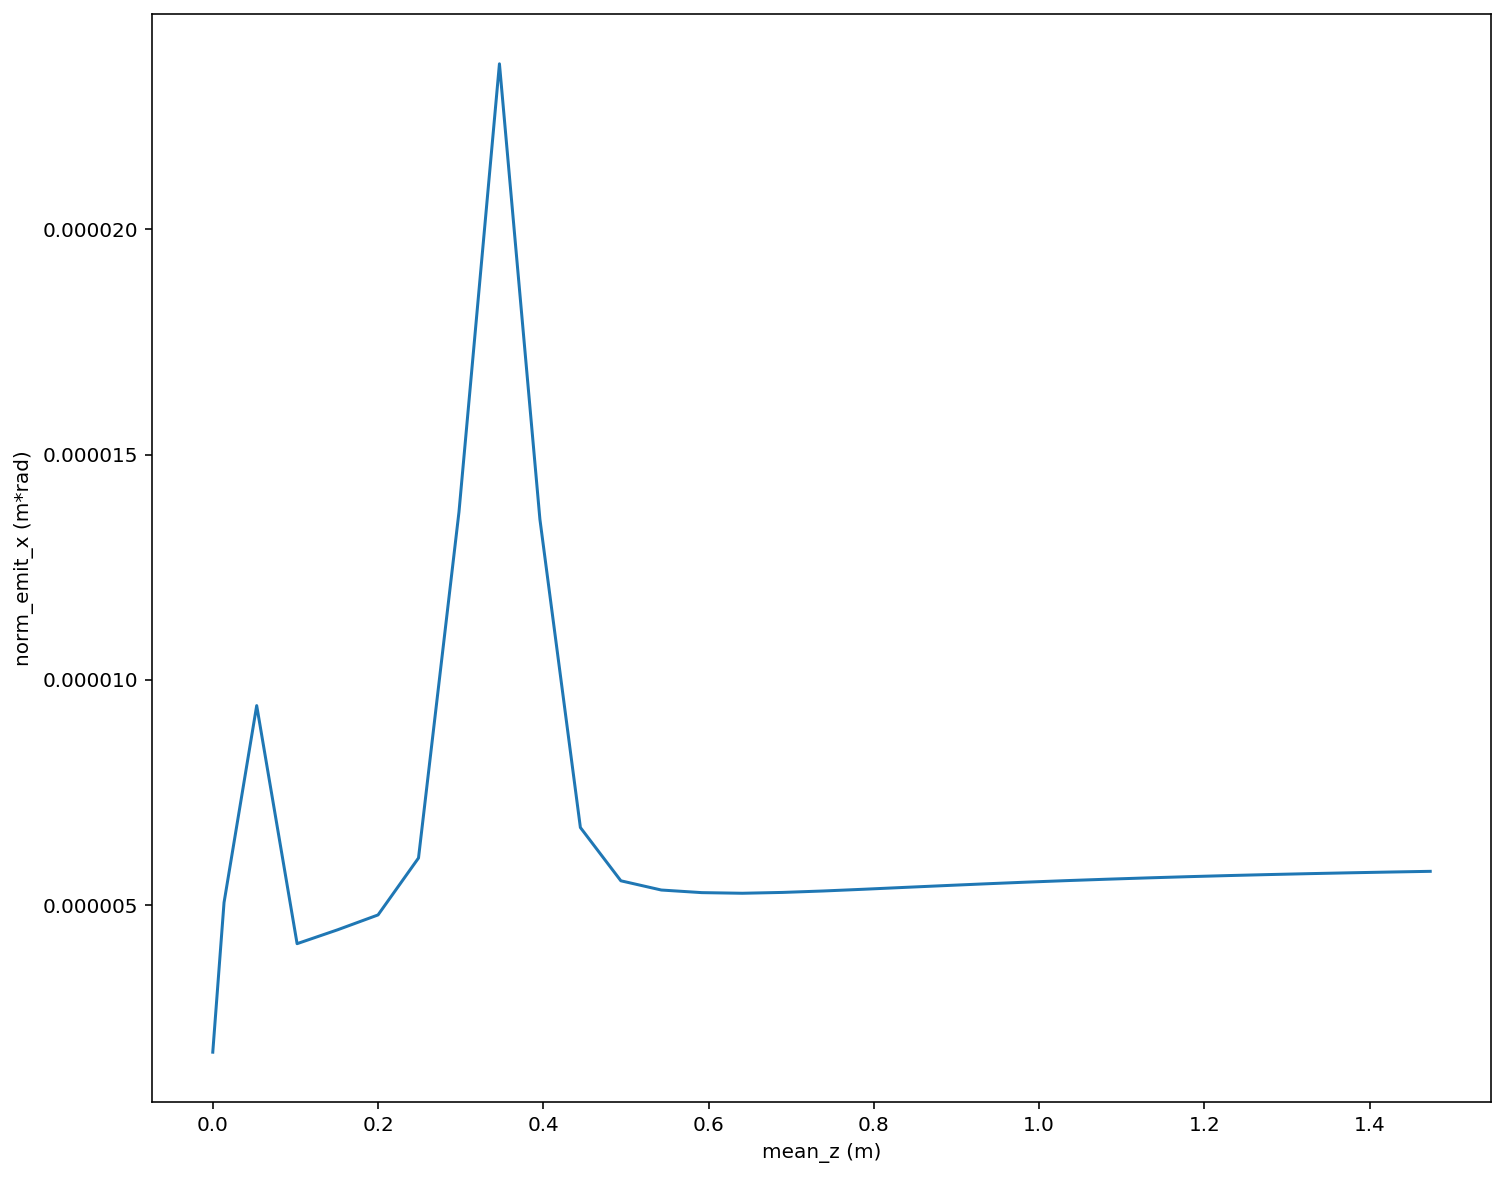

In [16]:
key1 = 'mean_z'
key2 = 'norm_emit_x'
dat1 = G.stat(key1)
dat2 = G.stat(key2)
units1 = G.stat_units(key1)
units2 = G.stat_units(key2)

fig, ax = plt.subplots()
ax.plot(dat1, dat2)
ax.set_xlabel(key1+f' ({units1})')
ax.set_ylabel(key2+f' ({units2})')

# Archiving to h5

In [17]:
# All input and output can be saved to an h5 file
archive_file = G.archive()

Archiving to file gpt_204b984ebe4043ebaa04786333b5520a.h5


In [18]:
# This can be loaded into the same object, or a new empty object
G2 = GPT(verbose=True)
G2.load_archive(archive_file)

Reading archive file gpt_204b984ebe4043ebaa04786333b5520a.h5
Loaded from archive. Note: Must reconfigure to run again.


In [19]:
# Spot check that a stat calc is the same
G2.stat('mean_x')[-1] == G.stat('mean_x')[-1]

True

In [20]:
# Cleanup
os.remove(archive_file)

# Particle Densities


In [21]:
from pmd_beamphysics.plot import marginal_plot

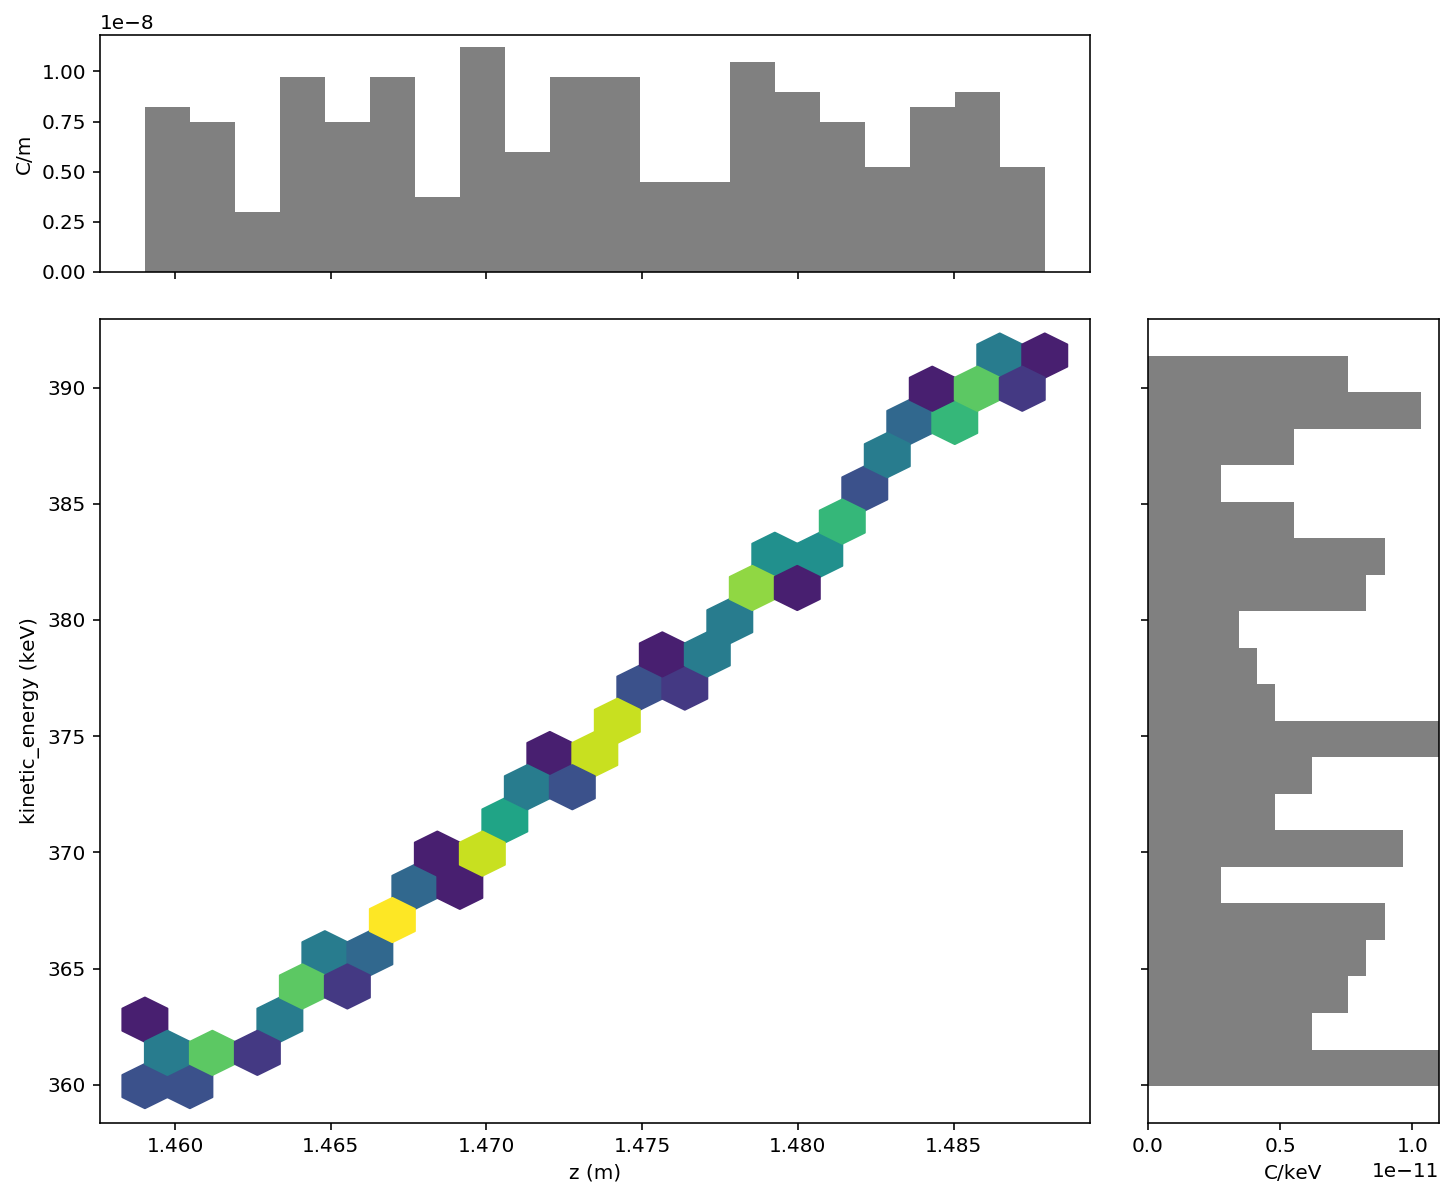

In [22]:
P = G.output['particles'][-1]

marginal_plot(P, 'z', 'kinetic_energy', bins=20)

In [23]:
# Running using the run_gpt: the actions above are combined into one user function
from gpt.gpt import run_gpt

In [24]:
G = run_gpt(settings={'gun_voltage':375,'sol_1_current':-3},
            gpt_input_file=INPUT_FILE)

In [25]:
print(G)

GPT object:
   Original input file: gpt.in
   Use temp directory: True
   Work directory: None

Run Control
   Run configured: True
   Using temp directory: False
   Timeout: 2500 (sec)

Results
   Finished: True
   Error occured: False
   Run time: 1.4940767288208008 (sec)


In [26]:
from gpt.gpt_distgen import run_gpt_with_distgen
GPT_INPUT_FILE = os.path.join(root,'templates/dcgun_distgen/gpt.in')
DISTGEN_INPUT_FILE = os.path.join(root,'templates/dcgun_distgen/distgen.in.json')

settings = {'gun_voltage':500,'sol_1_current':-4.5,'beam:params:sigma_xy:value':2.5}

G = run_gpt_with_distgen(settings=settings,
                         gpt_input_file=GPT_INPUT_FILE,
                         distgen_input_file=DISTGEN_INPUT_FILE,
                         verbose=False)

/Users/chrisonian/Code/miniconda3/envs/devel/lib/python3.7/site-packages/pint/quantity.py:221: BehaviorChangeWarning: The way Pint handles NumPy operations has changed with the
implementation of NEP 18. Unimplemented NumPy operations will now fail instead of making
assumptions about units. Some functions, eg concat, will now return Quanties with units, where
they returned ndarrays previously. See https://github.com/hgrecco/pint/pull/905.

To hide this warning, wrap your first creation of an array Quantity with
warnings.catch_warnings(), like the following:

import numpy as np
import warnings
from pint import Quantity

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Quantity([])

To disable the new behavior, see
https://www.numpy.org/neps/nep-0018-array-function-protocol.html#implementation

  warnings.warn(array_function_change_msg, BehaviorChangeWarning)


In [27]:
print(G)

GPT object:
   Original input file: gpt.in
   Use temp directory: True
   Work directory: None

Run Control
   Run configured: True
   Using temp directory: False
   Timeout: 2500 (sec)

Results
   Finished: True
   Error occured: False
   Run time: 22.233495950698853 (sec)


In [28]:
# Plot initial particle distribution
from gpt.parsers import read_particle_gdf_file
particles=read_particle_gdf_file(os.path.join(G.tempdir.name,'distgen_gpt_particles.gdf'))

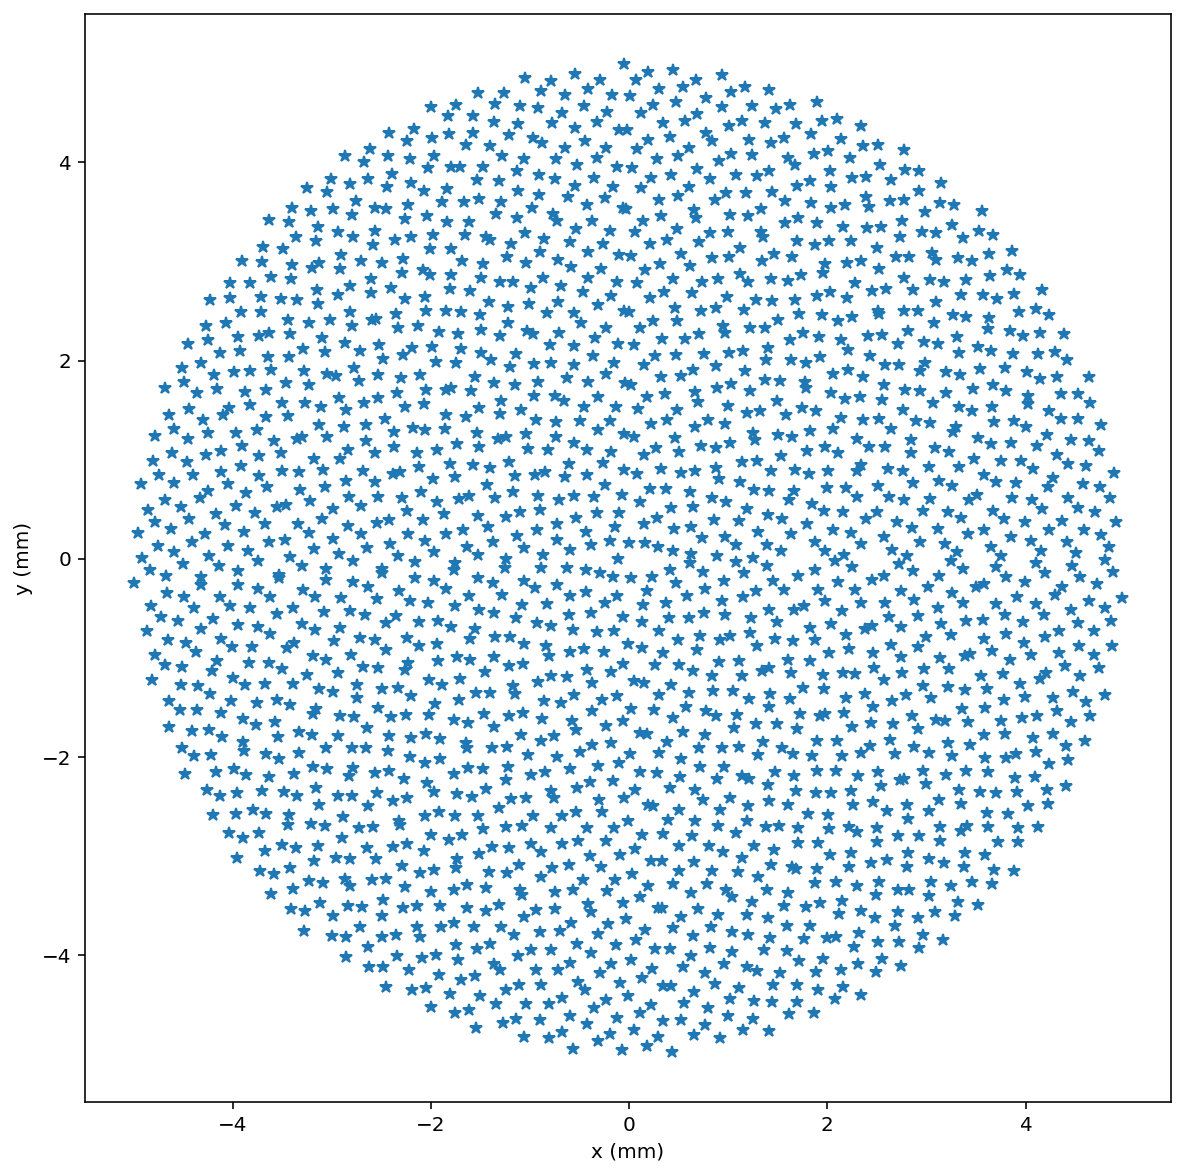

In [29]:
plt.figure()
plt.plot(1000*particles['x'],1000*particles['y'],'*')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.show()

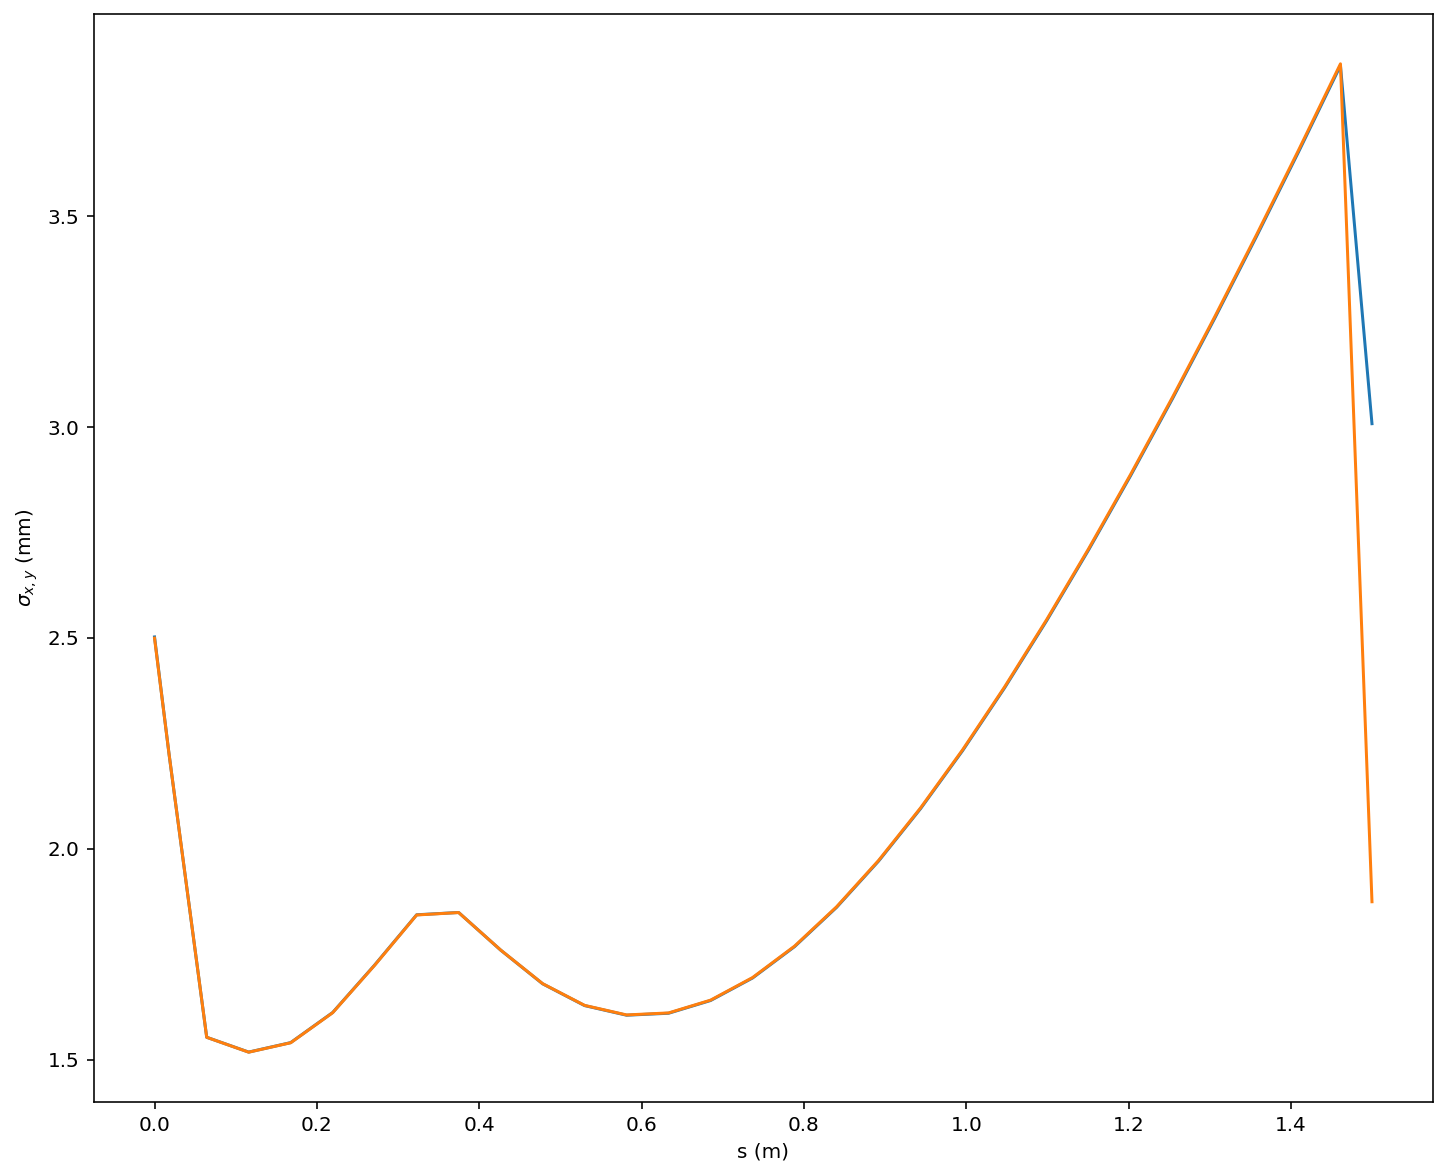

In [30]:
avgz = G.stat('mean_z')
stdx = 1000*G.stat('sigma_x')
stdy = 1000*G.stat('sigma_y')
plt.figure()
plt.plot(avgz,stdx,avgz,stdy)
plt.xlabel('s (m)')
plt.ylabel('$\sigma_{x,y}$ (mm)')
plt.show()

In [31]:
# Using the Evaluate method:

In [32]:
from gpt.evaluate import evaluate

result = evaluate(settings=settings,
                  simulation='gpt_with_distgen',
                  gpt_input_file=GPT_INPUT_FILE,
                  distgen_input_file=DISTGEN_INPUT_FILE,
                  archive_path='.',
                  verbose=False)

In [33]:
result

{'error': False,
 'fingerprint': 'f85e27067dabcf1d66659bd5022cbf24',
 'archive': '/Users/chrisonian/Code/GitHub/lume-gpt/examples/f85e27067dabcf1d66659bd5022cbf24.h5'}

In [34]:
# Cleanup
os.remove(result['archive'])